In [1]:
pwd


'C:\\Users\\dell'

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
lg=pd.read_csv('C:\\Users\\dell\\Downloads\\login_logs.csv')

In [51]:
lg

,login_log_id,user_id,login_time
0,1385328,99160,2021-07-01 00:00:33.0
1,1385329,83272,2021-07-01 00:00:38.0
2,1385330,83272,2021-07-01 00:00:42.0
3,1385331,96640,2021-07-01 00:02:08.0
4,1385332,99160,2021-07-01 00:02:38.0
...,...,...,...
666352,4670509,207632,2022-07-30 23:47:02.0
666353,4670510,207632,2022-07-30 23:49:39.0
666354,4670511,207632,2022-07-30 23:49:43.0
666355,4670512,111788,2022-07-30 23:51:22.0


In [52]:
soi=pd.read_csv('C:\\Users\\dell\\Downloads\\sales_orders_items.csv')

In [53]:
soi

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate
0,62609,7818,119874,1,0,4993.00
1,62610,7607,119877,1,0,6203.40
2,62611,9916,119880,2,2,2904.41
3,62612,11118,119880,2,2,2205.00
4,62613,12702,119880,2,2,2200.85
...,...,...,...,...,...,...
20483,157584,10975,318966,1,1,12632.00
20484,157585,10975,318966,1,0,11814.00
20485,157586,10975,318966,1,1,10110.00
20486,157587,3284,318969,1,0,5271.00


In [54]:
so=pd.read_csv('C:\\Users\\dell\\Downloads\\sales_orders.csv')

In [55]:
so


,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time
0,119874,82228,5,Rejected,2021-07-01 00:35:28.0
1,119877,40476,1,Rejected,2021-07-01 02:02:43.0
2,119880,41728,8,Shipped,2021-07-01 02:42:12.0
3,119883,97616,4,Rejected,2021-07-01 02:56:00.0
4,119886,12440,1,Rejected,2021-07-01 03:11:31.0
...,...,...,...,...,...
13625,318960,63380,10,Rejected,2022-07-30 16:02:58.0
13626,318963,69544,5,Rejected,2022-07-30 16:30:26.0
13627,318966,167048,1,Shipped,2022-07-30 16:57:31.0
13628,318969,122360,2,Rejected,2022-07-30 17:53:54.0


In [56]:
lg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666357 entries, 0 to 666356
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   login_log_id  666357 non-null  int64 
 1   user_id       666357 non-null  int64 
 2   login_time    666357 non-null  object
dtypes: int64(2), object(1)
memory usage: 15.3+ MB


In [57]:
lg.login_time.nunique()

575568

In [58]:
#print(lg.login_time.mean())

In [59]:
so.order_id.nunique()

13630

In [85]:
soi.fk_product_id.nunique()

787

In [60]:
# Assigning a log column to each logintime
lg['log'] = lg['login_time']
lg['user']= lg['user_id']
# Calculating total number of posts per week for each user
total_logs = lg.groupby(['user', 'log']).size().reset_index(name ='Total_logs')

# Estimating average frequency of making logs for each user
freq_login_per_logs = total_logs.groupby('log')['Total_logs'].mean().reset_index(name ='Avg_login_per_logs')

In [61]:
freq_login_per_logs 

,log,Avg_login_per_logs
0,2021-07-01 00:00:33.0,1.0
1,2021-07-01 00:00:38.0,1.0
2,2021-07-01 00:00:42.0,1.0
3,2021-07-01 00:02:08.0,1.0
4,2021-07-01 00:02:38.0,1.0
...,...,...
575563,2022-07-30 23:47:02.0,1.0
575564,2022-07-30 23:49:39.0,1.0
575565,2022-07-30 23:49:43.0,1.0
575566,2022-07-30 23:51:22.0,1.0


In [62]:
# Assigning sales column to each order
soi['sales'] = soi['ordered_quantity']
soi['order']= soi['order_quantity_accepted']
# Calculating total number of posts per week for each user
total_sales = soi.groupby(['sales','order']).size().reset_index(name ='Total_sales')

# Estimating average frequency of making logs for each user
freq_sales_per_person = total_sales.groupby('sales')['Total_sales'].mean().reset_index(name ='Avg_sales_per_person')

In [63]:
freq_sales_per_person

,sales,Avg_sales_per_person
0,1,6286.000000
1,2,1105.333333
2,3,288.750000
3,4,139.400000
4,5,183.166667
...,...,...
87,450,1.000000
88,481,1.000000
89,500,1.000000
90,835,1.000000


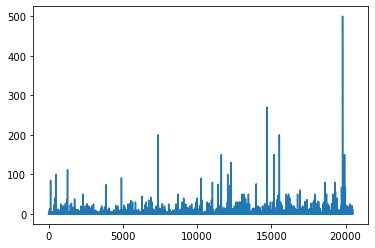

In [66]:
x1=soi['order_quantity_accepted']
plt.plot(x1)

plt.show()

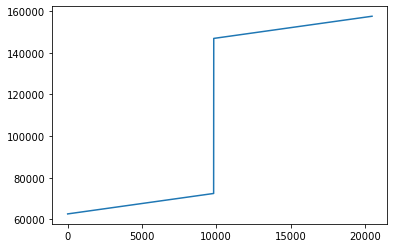

In [84]:
x1=soi['order_item_id']
 
plt.plot(x1)

plt.show()

In [81]:

x = so['order_id'].count()


print(x)


13630


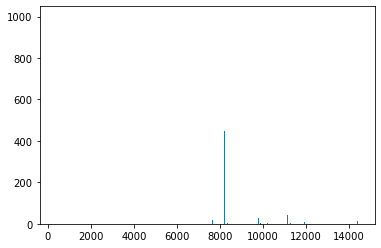

In [103]:
x=soi['fk_product_id']
y=soi['ordered_quantity']
plt.bar(x,y)
plt.show()

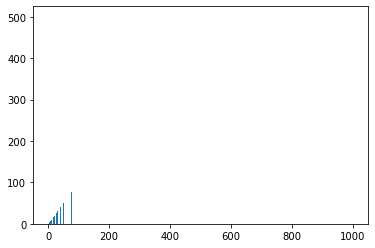

In [109]:
x=soi['ordered_quantity']
y=soi['order_quantity_accepted']


plt.bar(x,y)
plt.show()

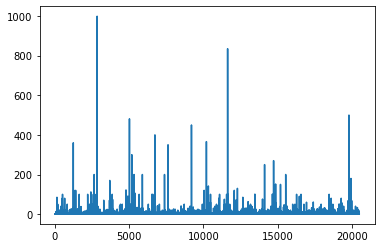

In [111]:
x=soi['ordered_quantity']


plt.plot(x)
plt.show()